In [4]:
names = [
    "Aaron",
    "Adam",
    "Alan",
    "Alex",
    "Alice",
    "Amy",
    "Anderson",
    "Andre",
    "Andrew",
    "Andy",
    "Anna",
    "Anthony",
    "Arthur",
    "Austin",
    "Blake",
    "Brandon",
    "Brian",
    "Carter",
    "Charles",
    "Charlie",
    "Christian",
    "Christopher",
    "Clark",
    "Cole",
    "Collins",
    "Connor",
    "Crew",
    "Crystal",
    "Daniel",
    "David",
    "Dean",
    "Edward",
    "Elizabeth",
    "Emily",
    "Eric",
    "Eva",
    "Ford",
    "Frank",
    "George",
    "Georgia",
    "Graham",
    "Grant",
    "Henry",
    "Ian",
    "Jack",
    "Jacob",
    "Jake",
    "James",
    "Jamie",
    "Jane",
    "Jason",
    "Jay",
    "Jennifer",
    "Jeremy",
    "Jessica",
    "John",
    "Jonathan",
    "Jordan",
    "Joseph",
    "Joshua",
    "Justin",
    "Kate",
    "Kelly",
    "Kevin",
    "Kyle",
    "Laura",
    "Leon",
    "Lewis",
    "Lisa",
    "Louis",
    "Luke",
    "Madison",
    "Marco",
    "Marcus",
    "Maria",
    "Mark",
    "Martin",
    "Mary",
    "Matthew",
    "Max",
    "Michael",
    "Michelle",
    "Morgan",
    "Patrick",
    "Paul",
    "Peter",
    "Prince",
    "Rachel",
    "Richard",
    "River",
    "Robert",
    "Roman",
    "Rose",
    "Ruby",
    "Russell",
    "Ryan",
    "Sarah",
    "Scott",
    "Sean",
    "Simon",
    "Stephen",
    "Steven",
    "Sullivan",
    "Taylor",
    "Thomas",
    "Tyler",
    "Victoria",
    "Warren",
    "William"
]

In [2]:
import torch
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-70m-deduped")

/scratch/pyllm/dhimoila/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [7]:
s = 0
t = 0
single_token = []
for name in names:
    t += 1
    if len(tokenizer.encode(name)) == 1 :
        s += 1
        single_token.append(name)

print(s, t)

66 109


In [ ]:
from datasets import load_dataset

: 

In [ ]:
ds = load_dataset("fahamu/ioi")

: 

In [8]:
s = 0
t = 0
for name in single_token:
    t += 1
    if len(tokenizer.encode("When " + name)) == 2:
        s += 1
    
print(s, t)

66 66


In [1]:
import graph_tool.all as gt

import random
import numpy as np
import torch
from matplotlib import pyplot as plt
import networkx as nx
from sklearn.cluster import SpectralClustering

<Graph object, directed, with 400 vertices and 1238 edges, at 0x1481b57e6da0>
<BlockState object with 400 blocks (2 nonempty), degree-corrected, for graph <Graph object, directed, with 400 vertices and 1238 edges, at 0x1481b57e6da0>, at 0x1481b57e76a0>


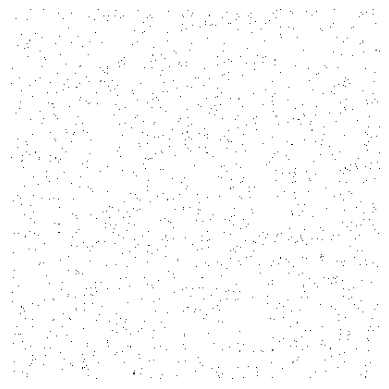

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (2, 2)>
  Coords	Values
  (0, 0)	1232.0
  (0, 1)	6.0
[[1232.    6.]
 [   0.    0.]]


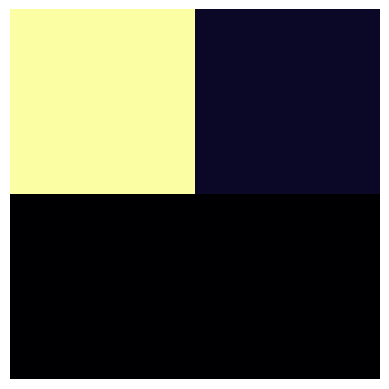

In [2]:
# Erdos-Renyi graph :
n = 400
p = 3 / (n - 1)
A_er = torch.rand(n, n) < p

G_gt = gt.Graph(directed=True)
G_gt.add_edge_list(A_er.nonzero().numpy())
print(G_gt)
B = 2
r = 1
state = gt.minimize_blockmodel_dl(G_gt, multilevel_mcmc_args=dict(B_min=B, B_max=B, r=r, parallel=True))
print(state)
propert_map = state.get_blocks()
propert_map = propert_map.get_array()
propert_map = torch.tensor(propert_map)

perm = torch.argsort(propert_map)
A_er = A_er[perm][:, perm]
plt.imshow(1-A_er.float(), cmap='gray')
plt.axis('off')
plt.show()

#state.draw(output_size=(200, 200))

b = gt.contiguous_map(state.get_blocks())
state = state.copy(b=b)

e = state.get_matrix()
print(e)

B = state.get_nonempty_B()
t = e.toarray()
print(t)
# visualize the matrix :
plt.imshow(t**0.5, cmap='inferno')
plt.axis('off')
plt.show()

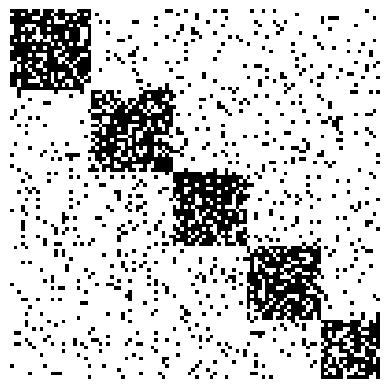

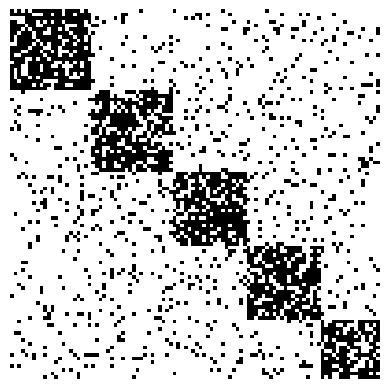

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x147d13f98b20, at 0x147d2b27ee60>,
 <GraphView object, directed, with 107 vertices and 106 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x147d30314df0, at 0x147d2b27ea70>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x147d30314df0, at 0x147d2b27eb30>, False), at 0x147d30314df0>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x147d30314df0, at 0x147d2b27cbb0>)

In [3]:
# plot for dummy adjacency matrices to show some graph structures

"""
Structures to show :
- modular structure
- core-periphery structure
- ordered structure
"""

n = 100

p_dense = 0.7
p_sparse = 0.1

# modular structure
n = 100
n_blocks = 5
while True:
    block_idx = torch.tensor(random.choices(torch.arange(n//n_blocks - 5, n//n_blocks+5), k=n_blocks-1))
    block_idx = torch.cumsum(block_idx, dim=0)
    if block_idx[-1] < n:
        break
block_idx = torch.cat((torch.tensor([0]), block_idx, torch.tensor([n])))

A_modular = torch.rand(n, n) < p_sparse
for i in range(n_blocks):
    A_modular[block_idx[i]:block_idx[i+1], block_idx[i]:block_idx[i+1]] = torch.rand(block_idx[i+1]-block_idx[i], block_idx[i+1]-block_idx[i]) < p_dense

plt.imshow(1 - A_modular.float(), cmap='gray')
plt.axis('off')
plt.show()

G_gt = gt.Graph(directed=True)
G_gt.add_edge_list(A_modular.nonzero().numpy())

state = gt.minimize_nested_blockmodel_dl(G_gt)

blockstate = state.get_levels()[0]
b = gt.contiguous_map(blockstate.get_blocks())
blockstate = blockstate.copy(b=b)

propert_map = blockstate.get_blocks()
propert_map = torch.tensor(propert_map)

perm = torch.argsort(propert_map)
A_modular = A_modular[perm][:, perm]

plt.imshow(1 - A_modular.float(), cmap='gray')
plt.axis('off')
plt.show()

e = blockstate.get_matrix()
B = blockstate.get_nonempty_B()
t = e.toarray()[:B, :B]

# Create new edge property (ep) named "t" and for each edge e=(u, v) set ep[e] = t[B_u, B_v]
ep = G_gt.new_edge_property("double")
for e in G_gt.edges():
    u, v = e
    ep[e] = t[propert_map[int(u)], propert_map[int(v)]]
G_gt.ep['t'] = ep

edge_color = G_gt.ep['t']

state.draw(output="modular.png", output_size=(400, 400), eorder=edge_color, edge_pen_width=gt.prop_to_size(edge_color, mi=1, ma=2, power=1, log=False))

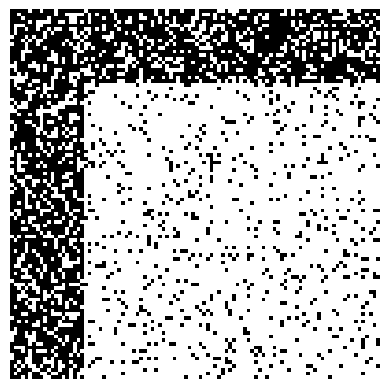

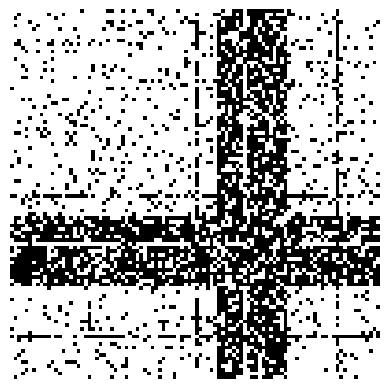

In [5]:
# core-periphery structure
n_core = 20
n_periphery = n - n_core
A_core_periphery = torch.rand(n, n) < p_sparse
A_core_periphery[:n_core, :] = torch.rand(n_core, n) < p_dense
A_core_periphery[:, :n_core] = torch.rand(n, n_core) < p_dense

plt.imshow(1 - A_core_periphery.float(), cmap='gray')
plt.axis('off')
plt.show()

G_gt = gt.Graph(directed=True)
G_gt.add_edge_list(A_core_periphery.nonzero().numpy())

state = gt.minimize_nested_blockmodel_dl(G_gt)
blockstate = state.get_levels()[0]
b = gt.contiguous_map(blockstate.get_blocks())
blockstate = blockstate.copy(b=b)

propert_map = blockstate.get_blocks()
propert_map = torch.tensor(propert_map)

perm = torch.argsort(propert_map)
A_core_periphery = A_core_periphery[perm][:, perm]

plt.imshow(1 - A_core_periphery.float(), cmap='gray')
plt.axis('off')
plt.show()

e = blockstate.get_matrix()
B = blockstate.get_nonempty_B()
t = e.toarray()[:B, :B]

# Create new edge property (ep) named "t" and for each edge e=(u, v) set ep[e] = t[B_u, B_v]
ep = G_gt.new_edge_property("double")
for e in G_gt.edges():
    u, v = e
    ep[e] = t[propert_map[int(u)], propert_map[int(v)]]
G_gt.ep['t'] = ep

edge_color = G_gt.ep['t']

state.draw(output_size=(400, 400), output="core_periphery.png", eorder=edge_color, edge_pen_width=gt.prop_to_size(edge_color, mi=0.5, ma=2, power=1, log=False))

import pickle

# Assume `G_gt` is your graph and `state_args` are defined

# Save the state to a file named "dummy_state.pkl"
with open("dummy_state.pkl", "wb") as f:
    pickle.dump(state, f)

In [1]:
import socket

hostname = socket.gethostname()

print(hostname)

login01


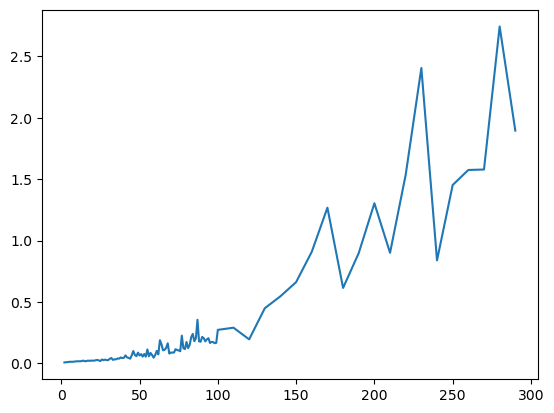

In [17]:
import time
import graph_tool.all as gt
import torch
from matplotlib import pyplot as plt
from tqdm import tqdm

ns = [100] + list(range(2, 100)) + list(range(100, 300, 10))
t = [1.963378667831421, 0.006550312042236328, 0.009035348892211914, 0.009070873260498047, 0.012032032012939453, 0.012030601501464844, 0.01216578483581543, 0.012775421142578125, 0.015335798263549805, 0.015766382217407227, 0.016280412673950195, 0.016531705856323242, 0.01762557029724121, 0.022164583206176758, 0.016646623611450195, 0.017831802368164062, 0.021909475326538086, 0.019816160202026367, 0.02218341827392578, 0.020901918411254883, 0.0219573974609375, 0.024624347686767578, 0.027451038360595703, 0.023135662078857422, 0.01841139793395996, 0.03085041046142578, 0.025343894958496094, 0.029861927032470703, 0.025432109832763672, 0.025658369064331055, 0.03693103790283203, 0.04302024841308594, 0.02789449691772461, 0.03206634521484375, 0.03224468231201172, 0.03940439224243164, 0.03791642189025879, 0.047580718994140625, 0.04213428497314453, 0.04482150077819824, 0.06422233581542969, 0.04831194877624512, 0.04381418228149414, 0.03747153282165527, 0.0645599365234375, 0.09962725639343262, 0.06803059577941895, 0.05772709846496582, 0.08681058883666992, 0.06342625617980957, 0.07480716705322266, 0.0544741153717041, 0.07541012763977051, 0.05409646034240723, 0.1128244400024414, 0.05680704116821289, 0.08432435989379883, 0.06698846817016602, 0.045590877532958984, 0.0668950080871582, 0.10092425346374512, 0.07248640060424805, 0.18813610076904297, 0.15528559684753418, 0.10572123527526855, 0.1095418930053711, 0.12538695335388184, 0.1628892421722412, 0.0791313648223877, 0.0876624584197998, 0.08715629577636719, 0.08756136894226074, 0.11502575874328613, 0.10806989669799805, 0.10480380058288574, 0.09806418418884277, 0.22543978691101074, 0.12257575988769531, 0.11574769020080566, 0.17373085021972656, 0.1237175464630127, 0.14870333671569824, 0.21282291412353516, 0.23948287963867188, 0.17976689338684082, 0.20469403266906738, 0.35465335845947266, 0.17934775352478027, 0.17533564567565918, 0.21473336219787598, 0.2050766944885254, 0.17863035202026367, 0.19446349143981934, 0.20441222190856934, 0.16521334648132324, 0.1747901439666748, 0.17281866073608398, 0.16336536407470703, 0.16663765907287598, 0.272202730178833, 0.29002833366394043, 0.19495677947998047, 0.4486098289489746, 0.5462374687194824, 0.6612837314605713, 0.9084439277648926, 1.2678699493408203, 0.6140592098236084, 0.8983485698699951, 1.3039641380310059, 0.900301456451416, 1.5369877815246582, 2.4061808586120605, 0.8388671875, 1.452751874923706, 1.5751652717590332, 1.578904151916504, 2.7444887161254883, 1.8958563804626465]

plt.plot(ns[1:], t[1:])
plt.show()

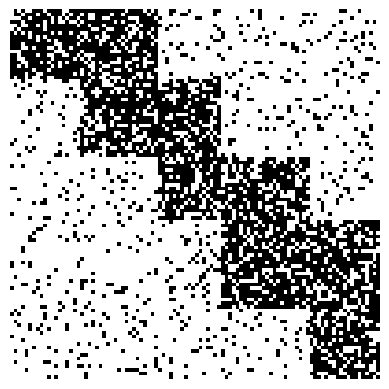

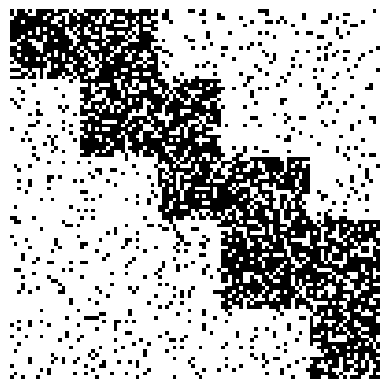

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1548fe4c10f0, at 0x1548fdee6590>,
 <GraphView object, directed, with 106 vertices and 105 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x1548fe4c0a90, at 0x1548fe6388e0>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x1548fe4c0a90, at 0x1548fe35b010>, False), at 0x1548fe4c0a90>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1548fe4c0a90, at 0x1548fe4c09d0>)

In [137]:
# ordered structure
n_blocks = 5
while True:
    block_idx = torch.tensor(random.choices(torch.arange(15, 25), k=n_blocks-1))
    block_idx = torch.cumsum(block_idx, dim=0)
    if block_idx[-1] < n:
        break
block_idx = torch.cat((torch.tensor([0]), block_idx, torch.tensor([n])))

A_ordered = torch.rand(n, n) < p_sparse
for i in range(n_blocks-1):
    A_ordered[block_idx[i]:block_idx[i+1], block_idx[i]:block_idx[i+2]] = torch.rand(block_idx[i+1]-block_idx[i], block_idx[i+2]-block_idx[i]) < p_dense
A_ordered[block_idx[-2]:block_idx[-1], block_idx[-2]:block_idx[-1]] = torch.rand(block_idx[-1]-block_idx[-2], block_idx[-1]-block_idx[-2]) < p_dense

plt.imshow(1 - A_ordered.float(), cmap='gray')
plt.axis('off')
plt.show()

G_gt = gt.Graph(directed=True)
G_gt.add_edge_list(A_ordered.nonzero().numpy())

state = gt.minimize_nested_blockmodel_dl(G_gt)
blockstate = state.get_levels()[0]
b = gt.contiguous_map(blockstate.get_blocks())
blockstate = blockstate.copy(b=b)

propert_map = blockstate.get_blocks()
propert_map = torch.tensor(propert_map)

perm = torch.argsort(propert_map)
A_ordered = A_ordered[perm][:, perm]

plt.imshow(1 - A_ordered.float(), cmap='gray')
plt.axis('off')
plt.show()

e = blockstate.get_matrix()
B = blockstate.get_nonempty_B()
t = e.toarray()[:B, :B]

# Create new edge property (ep) named "t" and for each edge e=(u, v) set ep[e] = t[B_u, B_v]
ep = G_gt.new_edge_property("double")
for e in G_gt.edges():
    u, v = e
    ep[e] = t[propert_map[int(u)], propert_map[int(v)]]
G_gt.ep['t'] = ep

edge_color = G_gt.ep['t']

state.draw(output_size=(400, 400), output="ordered.png", eorder=edge_color, edge_pen_width=gt.prop_to_size(edge_color, mi=0.5, ma=2, power=1, log=False))

In [120]:
vertex_order = blockstate.get_blocks()
# reorder the vertices with perm of blocks :
perm = [2, 1, 0, 3, 4]
new_property = []
for v in vertex_order:
    new_property.append(perm[v])
vertex_order.set_values(new_property)
state.draw(output_size=(400, 400), output="ordered.png", vorder=vertex_order, eorder=edge_color, edge_pen_width=gt.prop_to_size(edge_color, mi=0.5, ma=2, power=1, log=False))

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1548fe604820, at 0x1548ffd04e20>,
 <GraphView object, directed, with 106 vertices and 105 edges, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x1548fe024c40, at 0x1548ffd06560>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x1548fe024c40, at 0x1548fe0279d0>, False), at 0x1548fe024c40>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x1548fe024c40, at 0x1548fde8af50>)